In [1]:
from wordcloud import WordCloud

In [2]:
import re
import os
import pandas as pd

In [7]:
import nltk
from nltk.corpus import stopwords

In [ ]:
data_part_3 = pd.read_csv(r'C:/Users/user/Desktop/hansol/3rd_project/NLP_project/completed.csv')
data_part_3

In [10]:
import matplotlib.pyplot as plt

In [8]:
n_min = 4                                                           # 최소 단어 길이. 
corpus = []
for a_line in data_part_3:
    pre = re.sub(r'\W', ' ', a_line)                                # 특수문자 제외.
    pre = re.sub(r'_', ' ', pre)                                    # 특수문자 제외.
    pre = re.sub(r'\d+','', pre)                                    # 수자 제외. 
    pre = nltk.word_tokenize(pre)
    pre = [x for x in pre if len(x) > n_min]                        # 최소 길이 충족.
    pre = [x.lower() for x in pre]                                  # 소문자화.  정규화 (Normalization).
    pre = [x for x in pre if x not in stopwords.words('english')+['could']]   # 불용어 처리.
    corpus += pre                                                   # 단어를 말뭉치에 추가.

In [9]:
# Series 로 변환.
my_series = pd.Series(corpus)

# 도수 분포표. Top 10
my_word_counts = my_series.value_counts().sort_values(ascending=False)
my_word_counts[:10]

technology    10
dream          9
dreams         7
project        6
person         6
service        6
think          6
charge         5
money          4
services       4
dtype: int64

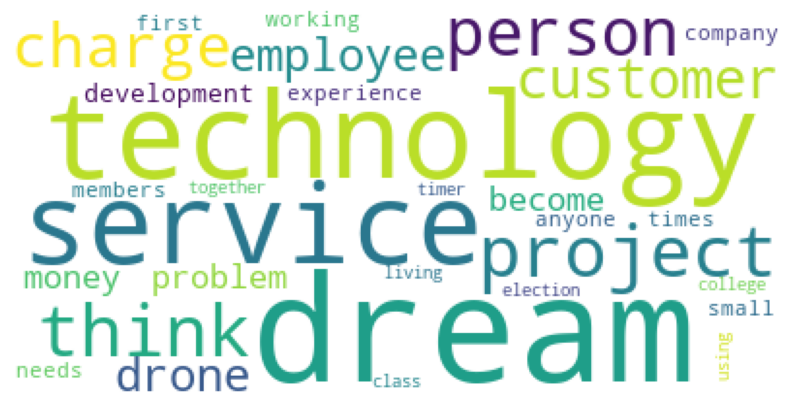

In [11]:
my_dict = dict(my_word_counts)

a_long_sentence = ' '.join(corpus)
wc = WordCloud(background_color='white', max_words=30)
wc.generate(a_long_sentence)


plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off") # 축을 꺼줌.
plt.show()